In [1]:
pip install tensorflow keras numpy matplotlib scikit-learn opencv-python



  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached h5py-3.12.1-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached ml_dtypes-0.4.1-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached MarkupSafe-3.0.2-cp311-cp311-win_amd64.whl.metadata (4.1 kB)


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [4]:
IMG_SIZE = 128
data_dir = "garbage-dataset"

categories = os.listdir(data_dir)
X, y = [], []

for category in categories:
    path = os.path.join(data_dir, category)
    label = categories.index(category)
    for img in os.listdir(path):
        try:
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            X.append(img_array)
            y.append(label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

X = np.array(X) / 255.0
y = np.array(y)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=len(categories))
y_test = to_categorical(y_test, num_classes=len(categories))


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])


c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 100s 195ms/step - accuracy: 0.3404 - loss: 2.0482 - val_accuracy: 0.5429 - val_loss: 1.3827
Epoch 2/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 98s 198ms/step - accuracy: 0.5424 - loss: 1.3527 - val_accuracy: 0.6049 - val_loss: 1.2012
Epoch 3/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 97s 197ms/step - accuracy: 0.6228 - loss: 1.1269 - val_accuracy: 0.5988 - val_loss: 1.2316
Epoch 4/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 100s 202ms/step - accuracy: 0.6680 - loss: 0.9918 - val_accuracy: 0.6582 - val_loss: 1.0142
Epoch 5/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 99s 200ms/step - accuracy: 0.7481 - loss: 0.7678 - val_accuracy: 0.6764 - val_loss: 1.0282
Epoch 6/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 97s 197ms/step - accuracy: 0.7912 - loss: 0.6164 - val_accuracy: 0.6876 - val_loss: 1.0976
Epoch 7/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 100s 201ms/step - accuracy: 0.7973 - loss: 0.5837 - val_accuracy: 0.6744 - val_loss: 1.0723
Epoch 8/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 97s 196ms/step - accuracy: 0.8330 - loss

In [9]:
recyclability = {
    "battery": False,
    "biological": False,
    "cardboard": True,
    "clothes": False,
    "glass": True,
    "metal": True,
    "paper": True,
    "plastic": True,
    "shoes": False,
    "trash": False
}


In [10]:
def predict_recyclability(image_path, model, categories, recyclability):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    predicted_category = categories[np.argmax(prediction)]
    return predicted_category, recyclability[predicted_category]


In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.7036 - loss: 1.2662
Test Accuracy: 70.12%


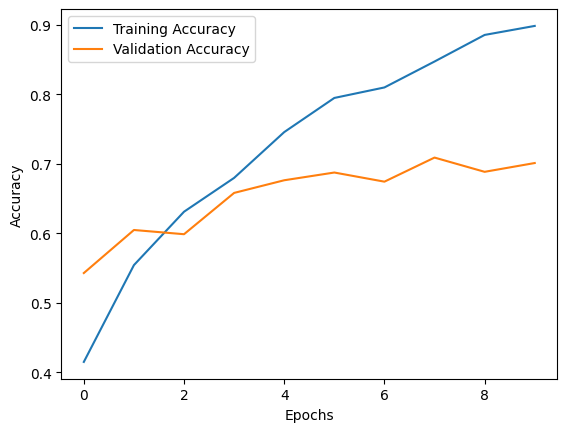

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [13]:
model.save("waste_classification_model.h5")


In [14]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\prana\AppData\Local\Temp\tmp2b98a9xa\assets


INFO:tensorflow:Assets written to: C:\Users\prana\AppData\Local\Temp\tmp2b98a9xa\assets


Saved artifact at 'C:\Users\prana\AppData\Local\Temp\tmp2b98a9xa'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1361367716816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1361367717584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1361367717200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1361367718928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1361367718160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1361367719888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1361367719696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1361367720464: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [17]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Constants
IMG_SIZE = 128
MODEL_PATH = "waste_classification_model.h5"
CATEGORIES = ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']

# Recyclability mapping
RECYCLABILITY = {
    "battery": False,
    "biological": False,
    "cardboard": True,
    "clothes": False,
    "glass": True,
    "metal": True,
    "paper": True,
    "plastic": True,
    "shoes": False,
    "trash": False
}

# Load the trained model
model = load_model(MODEL_PATH)

# Function to predict waste type and recyclability
def predict_waste(image_path, model, categories, recyclability):
    try:
        # Load and preprocess the image
        img = cv2.imread(image_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to match model input size
        img = img / 255.0  # Normalize pixel values to [0, 1]
        img = np.expand_dims(img, axis=0)  # Add batch dimension

        # Predict the category
        prediction = model.predict(img)
        predicted_index = np.argmax(prediction)
        predicted_category = categories[predicted_index]
        is_recyclable = recyclability[predicted_category]

        return predicted_category, is_recyclable
    except Exception as e:
        return None, f"Error processing image: {e}"

# Test a single image
def test_single_image(image_path):
    predicted_category, is_recyclable = predict_waste(image_path, model, CATEGORIES, RECYCLABILITY)
    if predicted_category:
        print(f"Image Path: {image_path}")
        print(f"Predicted Category: {predicted_category}")
        print(f"Recyclable: {'Yes' if is_recyclable else 'No'}")
    else:
        print(f"Error: {is_recyclable}")

# Provide the image path here
image_path = "image.png"
test_single_image(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Image Path: image.png
Predicted Category: glass
Recyclable: Yes
